In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
data = pd.read_csv("data/data/train_data_final_50k.csv", header = None)

## Data Visualization

In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,528,158,112,23,0.150380,0.146330,0.142520,0.153820,0.148660,0.138230,...,0.149050,0.148270,0.140620,0.133380,0.134310,0.138130,0.139070,0.134450,0.124640,1
1,367,89,173,20,0.212500,0.197260,0.194210,0.215200,0.204170,0.202180,...,0.123590,0.120340,0.116290,0.114440,0.111110,0.110490,0.108930,0.106310,0.104780,1
2,283,190,55,17,0.027484,0.036190,0.046603,0.019973,0.032946,0.047286,...,0.114170,0.111660,0.111410,0.111810,0.110960,0.109900,0.109130,0.108310,0.106670,0
3,424,166,90,29,0.174210,0.170880,0.174460,0.190960,0.182380,0.176380,...,0.109080,0.103190,0.096503,0.091461,0.088297,0.085691,0.084188,0.082517,0.081374,1
4,18,221,249,25,0.055317,0.058417,0.059609,0.042918,0.049833,0.056509,...,0.020098,0.020716,0.021334,0.021952,0.022570,0.023188,0.023806,0.024424,0.025042,1


### Distribution of Patients

62


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B04A518D0>]],
      dtype=object)

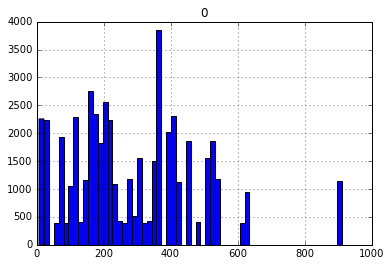

In [27]:
print(len(set(data[0])))
pd.DataFrame.hist(data,column = 0,bins = 62 )

### Distribution of Labels

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B04C0EB70>]],
      dtype=object)

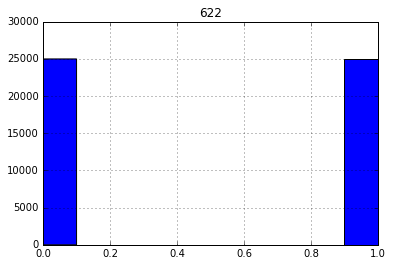

In [28]:
pd.DataFrame.hist(data,column = 622,xlabelsize = 10)

We should ensure that the patients present in the training set shhould not be in the testing set at any cost. Hence, the patients with ids greater than 500 are in the testing set and the ids less than 500 are in the training set.  

In [29]:
train_data = data[data[0]<500]
test_data = data[data[0]>=500]

In [30]:
print(train_data.shape)
print(test_data.shape)
#features = train_data.drop([0,1,2,3,622],axis = 1) #dropping patient ID, and xyz coordinates.  

#print(features.shape)

(42920, 623)
(7080, 623)


In [31]:
train_labels = train_data[622]
test_labels = test_data[622]
train_features = train_data.drop([0,1,2,3,622],axis = 1) #dropping patient ID, and xyz coordinates.
test_features = test_data.drop([0,1,2,3,622],axis = 1)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(42920, 618)
(7080, 618)
(42920,)
(7080,)


In [32]:
#x_train = features[:40000]
#y_train = labels[:40000]
#x_test = features[40000:]
#y_test = labels[40000:]

In [33]:
scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)
#x_train_scaled[0:5]
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [34]:
model1 = DecisionTreeClassifier(random_state = 42)
model2 = DecisionTreeClassifier(random_state = 42)
#model.fit(x_train_scaled,y_train)

In [35]:
model1.fit(train_features,train_labels)
test_preds = model1.predict(test_features)
print(accuracy_score(test_labels,test_preds))

0.5918079096045198


In [36]:
model2.fit(train_features_scaled,train_labels)
test_preds = model2.predict(test_features_scaled)
print(accuracy_score(test_labels,test_preds))

0.5915254237288136
